# Logistic Regression

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

![logistic_reg1](./images/logistic_reg1.png)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 

In [2]:
def linear_model_format_X(X):
    if len(X.shape) == 1:
        X = X.copy().reshape(-1,1)
    
    return np.hstack(tup= ( np.ones(shape=(X.shape[0],1)) , X ) )

## Cost Function

### The cross-entropy loss function
We need a loss function that expresses, for an observationx, how close the classifier output 

        ( ˆy = σ(w·x+b) ) 
        
is to the correct output (y, which is 0 or 1). We’ll call this:

        L(ˆy,y) =How much  ˆy differs from the true y 
        
We do this via a loss function that prefers the correct class labels of the train-ing examples to bemore likely.  This is called conditional maximum likelihood estimation:  we choose the parametersw,b thatmaximize the log probability ofthe true y labels in the training datagiven the observations x.  The resulting loss function is the negative log likelihood loss, generally called the cross-entropy loss.

![logistic_reg_2](./images/logistic_reg2.png)
![logistic_reg3](./images/logistic_reg3.png)

In [3]:
def calculate_entropy_cost(y_pred,y):
    
    part_1 = y * np.log(y_pred)
    
    part_2 = (1 - y) * np.log(1 - y_pred) 
    
    cost = ( -1 / y_pred.shape[0] ) * np.sum(part_1 + part_2)   
    return cost

## Sigmoid Function

![logistic_reg11](./images/logistic_reg11.png)

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## Gradient Descent Algorithm

![logistic_reg4](./images/logistic_reg4.png)

![logistic_reg_9](./images/logistic_reg9.png)

### Math Calculation for Gradient Descent
![logistic_reg5](./images/logistic_reg5.png)

![logistic_reg6](./images/logistic_reg6.png)

![logistic_reg7](./images/logistic_reg7.png)

In [5]:
class LogisticRegression:
    def __init__(self,alpha = 0.01 ,iterations = 10000):
        self.alpha = alpha
        self.iterations = iterations
        self._theta = None
        self._X = None
        self._y = None
        self._theta_history = None
        self._cost_history = None
    
    def _format_X_for_theta_0(self,X_i):
        
        X_i = X_i.copy()
        if len(X_i.shape) == 1:
            X_i = X_i.reshape(-1,1)
            
        if False in (X_i[...,0] == 1):        
            return np.hstack(tup=(np.ones(shape=(X_i.shape[0],1)) , X_i))
        else:
            return X_i
    
    @property
    def X(self):
        return self._X
    
    @property
    def y(self):
        return self._y
    
    @property
    def theta(self):
        return self._theta
    
    @property
    def theta_history(self):
        return self._theta_history
    
    @property
    def cost_history(self):
        return self._cost_history
    
    def predict(self,X):
        format_X = self._format_X_for_theta_0(X)
        
        if format_X.shape[1] == self._theta.shape[0]:
            y_pred = sigmoid(format_X @ self._theta) # (m,1) = (m,n) * (n,1)
            return y_pred
        elif format_X.shape[1] == self._theta.shape[1]:
            y_pred = sigmoid(format_X @ self._theta.T) # (m,1) = (m,n) * (n,1)
            return y_pred
        else:
            raise ValueError("Shape is not proper.")
            
    
    def train(self, X, y, verbose=True, method="BGD", theta_precision = 0.001, batch_size=30, regularization=False, penalty=1.0):
        
        self._X = self._format_X_for_theta_0(X)
        self._y = y

        # number of features+1 because of theta_0
        self._n = self._X.shape[1]
        self._m = self._y.shape[0]

        self._theta_history = []
        self._cost_history = []

        if method == "BGD":
            self._theta = np.random.rand(1,self._n) * theta_precision
            if verbose: print("random initial θ value :",self._theta)
            
            for iteration in range(self.iterations):
                # calculate y_pred 
                y_pred = self.predict(self._X)
                
                # new θ to replace old θ
                new_theta = None

                # simultaneous operation 
                
                if regularization:
                    gradient = np.mean( ( y_pred - self._y ) * self._X, axis = 0 )
                    new_theta = self._theta * (1 - (penalty/self._m) ) - (self.alpha *  gradient)
                    
                else:
                    gradient = np.mean( ( y_pred - self._y ) * self._X, axis = 0 )
                    new_theta = self._theta - (self.alpha *  gradient)

                if np.isnan(np.sum(new_theta)) or np.isinf(np.sum(new_theta)):
                    print("breaking. found inf or nan.")
                    break
                # override with new θ 
                self._theta = new_theta

                # calculate cost to put in history
                cost = calculate_entropy_cost(y_pred = self.predict(X=self._X), y = self._y)
                self._cost_history.append(cost)

                # calcualted theta in history
                self._theta_history.append(self._theta[0])
                
        elif method == "SGD": # stochastic gradient descent
            self._theta = np.random.rand(1,self._n) * theta_precision
            if verbose: print("random initial θ value :",self._theta)
            
            for iteration in range(self.iterations):
                
                # creating indices for batches
                indices = np.random.randint(0,self._m,size=batch_size)
                
                # creating batch for this iteration
                X_batch = np.take(self._X,indices,axis=0)
                y_batch = np.take(self._y,indices,axis=0)
                
                # calculate y_pred 
                y_pred = self.predict(X_batch)
                # new θ to replace old θ
                new_theta = None
                
                # simultaneous operation 
                if regularization:
                    gradient = np.mean( ( y_pred - y_batch ) * X_batch, axis = 0 )
                    new_theta = self._theta * (1 - (penalty/self._m) ) - (self.alpha *  gradient)
                    
                else:
                    gradient = np.mean( ( y_pred - y_batch ) * X_batch, axis = 0 )
                    new_theta = self._theta - (self.alpha *  gradient)

                if np.isnan(np.sum(new_theta)) or np.isinf(np.sum(new_theta)):
                    print("breaking. found inf or nan.")
                    break
                # override with new θ 
                self._theta = new_theta

                # calculate cost to put in history
                cost = calculate_entropy_cost(y_pred = self.predict(X=X_batch), y = y_batch)
                self._cost_history.append(cost)

                # calcualted theta in history
                self._theta_history.append(self._theta[0])
            
        else:
            print("No Method Defined.")
      
    

In [6]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

df = pd.DataFrame(data=dataset.data,columns=dataset.feature_names)
df["target"] = dataset.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
X = df[dataset.feature_names].values
y = df["target"].values.reshape(-1,1)

X.shape, y.shape

((569, 30), (569, 1))

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score

scaler = StandardScaler()


X_i = df[dataset.feature_names].values
y = df["target"].values.reshape(-1,1)


X_scaled = scaler.fit_transform(X_i)

## Logitsic Regression without Regression

### Batch Gradient Descent

random initial θ value : [[5.74703082e-04 4.71032616e-04 5.86195968e-04 5.30677034e-04
  8.39777848e-04 2.35546055e-04 3.54409727e-04 9.11191843e-04
  4.46163091e-04 4.54831035e-04 5.13451570e-04 9.70863643e-04
  6.25466964e-05 4.99212828e-04 5.50661555e-05 8.21687604e-04
  2.24909707e-04 8.10074729e-04 1.95031438e-04 7.37230152e-04
  4.74830711e-04 9.84842580e-05 5.86043108e-04 4.20604638e-04
  4.63348938e-04 8.94856500e-04 1.48944135e-04 1.69959185e-04
  8.51288513e-04 3.22160174e-04 4.60831408e-04]]
Fit theta : [[ 0.43168729 -0.48934958 -0.50218823 -0.48005053 -0.49417506 -0.18800103
  -0.07390946 -0.40855072 -0.52618989 -0.10620778  0.26989227 -0.5251592
   0.00137944 -0.42197757 -0.45855879 -0.04395563  0.24774104  0.10823787
  -0.07840602  0.12929622  0.30317484 -0.6283932  -0.64871803 -0.59106473
  -0.59726574 -0.48655005 -0.21378394 -0.42222993 -0.57293593 -0.43083534
  -0.13508832]]

Confusion Matrix : 
[[205   7]
 [  2 355]]
Accuracy Score   : 
0.984182776801406



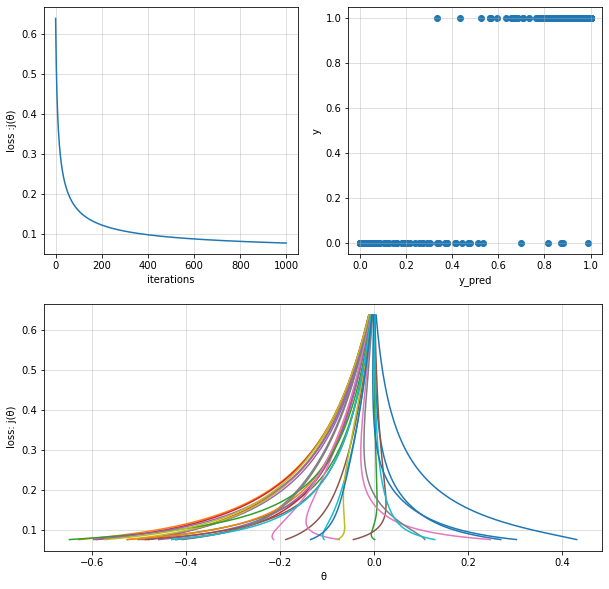

In [9]:
logisitc_reg_model1 = LogisticRegression(alpha=0.03,iterations=1000)
logisitc_reg_model1.train(X=X_scaled, y=y, method="BGD")

y = logisitc_reg_model1.y
y_pred = logisitc_reg_model1.predict(X_scaled)
theta = logisitc_reg_model1.theta
theta_history = logisitc_reg_model1.theta_history
cost_history = logisitc_reg_model1.cost_history


print("Fit theta :",theta)

print(f"""
Confusion Matrix : 
{confusion_matrix(y,y_pred>0.5)}
Accuracy Score   : 
{accuracy_score(y,y_pred>0.5)}
""")


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(θ)"
)
ax.plot(cost_history)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="y_pred",
    ylabel="y"
)
ax.scatter(y_pred,y)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(θ)",
    xlabel="θ"
)
ax.plot(theta_history,cost_history)
ax.grid(alpha=0.5)
plt.show()

### Stochastic Gradient Descent

random initial θ value : [[1.09912174e-04 8.34680335e-04 2.71425087e-04 4.45312035e-04
  7.98836140e-04 4.28533054e-04 9.44840875e-04 4.41663604e-04
  7.38275406e-04 1.05384396e-04 1.42947387e-04 4.71697651e-04
  2.28755860e-04 9.58246539e-04 6.40545668e-04 7.74913441e-04
  2.13497419e-04 1.13100122e-05 1.38792113e-04 6.44988918e-04
  1.60596138e-04 2.69481934e-04 4.50490753e-04 5.60975348e-04
  1.28496519e-04 8.37004598e-04 4.36847004e-05 8.43982638e-04
  2.11988089e-04 1.01656750e-04 5.01642477e-04]]
Fit theta : [[ 0.43116447 -0.49124405 -0.50615353 -0.48268779 -0.49524887 -0.18498763
  -0.08043675 -0.40902284 -0.52894532 -0.1034032   0.26751382 -0.52051526
  -0.00129325 -0.41756737 -0.45620155 -0.05173312  0.24446555  0.1165601
  -0.07753539  0.12333744  0.3039229  -0.62815577 -0.65132667 -0.59082605
  -0.59673165 -0.48894538 -0.21615393 -0.41888482 -0.575707   -0.43025533
  -0.13421421]]

Confusion Matrix : 
[[205   7]
 [  2 355]]
Accuracy Score   : 
0.984182776801406



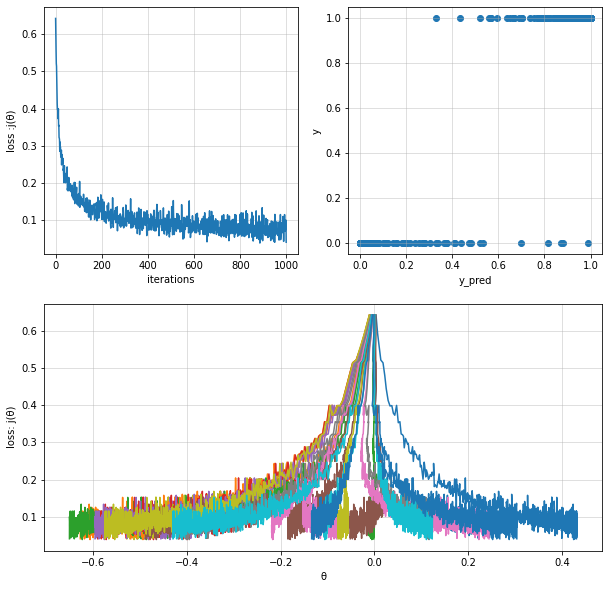

In [10]:
logisitc_reg_model2 = LogisticRegression(alpha=0.03,iterations=1000)
logisitc_reg_model2.train(X=X_scaled, y=y, method="SGD",batch_size=200)

y = logisitc_reg_model2.y
y_pred = logisitc_reg_model2.predict(X_scaled)
theta = logisitc_reg_model2.theta
theta_history = logisitc_reg_model2.theta_history
cost_history = logisitc_reg_model2.cost_history


print("Fit theta :",theta)

print(f"""
Confusion Matrix : 
{confusion_matrix(y,y_pred>0.5)}
Accuracy Score   : 
{accuracy_score(y,y_pred>0.5)}
""")


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(θ)"
)
ax.plot(cost_history)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="y_pred",
    ylabel="y"
)
ax.scatter(y_pred,y)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(θ)",
    xlabel="θ"
)
ax.plot(theta_history,cost_history)
ax.grid(alpha=0.5)
plt.show()

## Logistic Regression with Regularization

![logistic_reg8](./images/logistic_reg8.png)

- Addressing Overfitting
    - Reduce features
        - manually select
        - model selection algorithm
    - Regularization
        - Keep all the features but reduce magnitude/values of parameter theta
        - Works well when we have a lot of features and each contributes a bit to predicting y

![logistic_reg10](./images/logistic_reg10.png)

### Stochastic Gradient Descent

random initial θ value : [[9.09252764e-04 1.33500512e-04 5.54522750e-04 2.79117807e-04
  2.21102293e-04 4.18690358e-04 1.33652330e-04 3.30488273e-04
  3.98861625e-05 4.33622696e-04 3.19906904e-04 3.83208532e-04
  1.94834901e-04 6.69813079e-05 8.57053483e-04 5.04738695e-04
  4.01280860e-04 1.62716551e-04 1.81609888e-05 8.21627484e-04
  9.62478666e-04 5.45115998e-04 5.87813087e-04 7.82032089e-04
  7.42309338e-04 6.76258181e-04 5.01840721e-04 8.69243151e-05
  3.57521379e-04 1.23530714e-04 9.55658748e-04]]
Fit theta : [[ 0.29201839 -0.30904497 -0.29120307 -0.30488441 -0.3103726  -0.11485783
  -0.08407961 -0.26210412 -0.33249938 -0.08113727  0.1412598  -0.30813548
   0.00227193 -0.25413418 -0.27254151 -0.02466528  0.10340029  0.05018421
  -0.05861405  0.05027491  0.14859014 -0.38346923 -0.36721243 -0.364844
  -0.36359499 -0.28117426 -0.1604856  -0.26323775 -0.35494232 -0.26339832
  -0.10134939]]

Confusion Matrix : 
[[205   7]
 [  2 355]]
Accuracy Score   : 
0.984182776801406



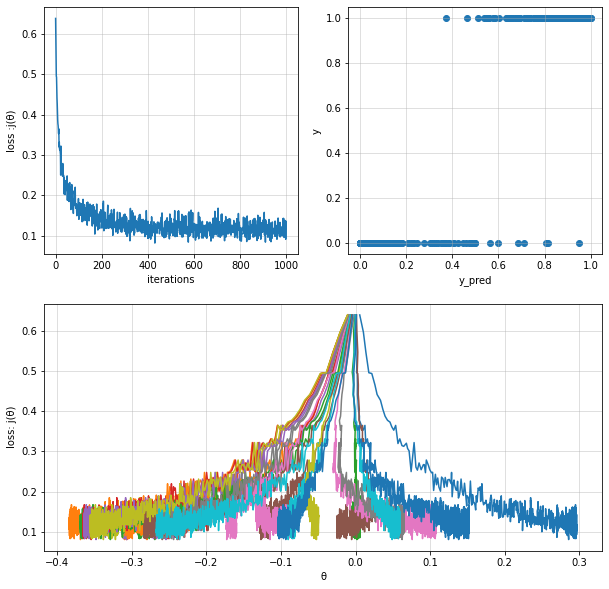

In [11]:
logisitc_reg_model3 = LogisticRegression(alpha=0.03,iterations=1000)
logisitc_reg_model3.train(X=X_scaled, y=y, method="SGD",batch_size=200,regularization=True,penalty=1.0)

y = logisitc_reg_model3.y
y_pred = logisitc_reg_model3.predict(X_scaled)
theta = logisitc_reg_model3.theta
theta_history = logisitc_reg_model3.theta_history
cost_history = logisitc_reg_model3.cost_history


print("Fit theta :",theta)

print(f"""
Confusion Matrix : 
{confusion_matrix(y,y_pred>0.5)}
Accuracy Score   : 
{accuracy_score(y,y_pred>0.5)}
""")


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(θ)"
)
ax.plot(cost_history)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="y_pred",
    ylabel="y"
)
ax.scatter(y_pred,y)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(θ)",
    xlabel="θ"
)
ax.plot(theta_history,cost_history)
ax.grid(alpha=0.5)
plt.show()

### Batch Gradient Descent

random initial θ value : [[4.84214942e-04 3.43965556e-04 6.74991399e-04 2.36213023e-04
  7.40369339e-04 2.54252059e-04 5.64521811e-04 1.28879416e-04
  9.20826852e-04 6.68703295e-04 2.13196989e-04 3.74964476e-04
  8.47703767e-05 5.72874402e-04 8.53488606e-04 8.59667376e-04
  5.80327243e-04 7.14404428e-04 6.62060305e-04 9.02027069e-04
  2.88731152e-04 6.79939264e-05 1.01639096e-04 2.19541671e-04
  8.70128319e-04 8.21146551e-04 1.84816517e-04 2.74084145e-04
  2.52581705e-04 7.72880420e-04 5.21540872e-04]]
Fit theta : [[ 0.24023623 -0.25672808 -0.22183872 -0.25443321 -0.25472189 -0.0964945
  -0.09239663 -0.21068833 -0.26976416 -0.07381436  0.10263725 -0.23492013
   0.00430926 -0.19963025 -0.21149316 -0.00984544  0.05727022  0.0409924
  -0.05061024  0.03714926  0.10574132 -0.30733318 -0.27443406 -0.29527939
  -0.28944685 -0.21214485 -0.14643157 -0.20807336 -0.28539244 -0.20169207
  -0.08572373]]

Confusion Matrix : 
[[202  10]
 [  3 354]]
Accuracy Score   : 
0.9771528998242531



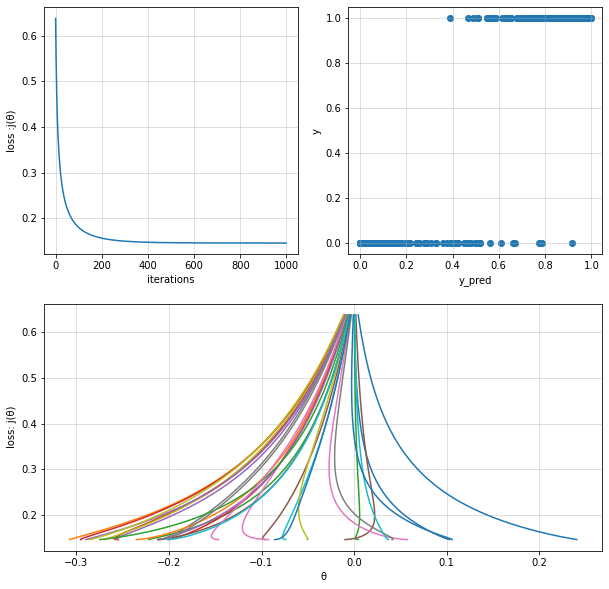

In [12]:
logisitc_reg_model4 = LogisticRegression(alpha=0.03,iterations=1000)
logisitc_reg_model4.train(X=X_scaled, y=y, method="BGD",regularization=True,penalty=2.0)

y = logisitc_reg_model4.y
y_pred = logisitc_reg_model4.predict(X_scaled)
theta = logisitc_reg_model4.theta
theta_history = logisitc_reg_model4.theta_history
cost_history = logisitc_reg_model4.cost_history


print("Fit theta :",theta)

print(f"""
Confusion Matrix : 
{confusion_matrix(y,y_pred>0.5)}
Accuracy Score   : 
{accuracy_score(y,y_pred>0.5)}
""")


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(θ)"
)
ax.plot(cost_history)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="y_pred",
    ylabel="y"
)
ax.scatter(y_pred,y)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(θ)",
    xlabel="θ"
)
ax.plot(theta_history,cost_history)
ax.grid(alpha=0.5)
plt.show()